In [10]:
import numpy as np
import pathlib
import pandas
from PIL import Image
import matplotlib.pyplot as plt
import itertools
import re
import GeneClass as Gene
from PIL import Image
import os



cwd = pathlib.Path.cwd()

# exon = "ATGGCGACCGCGGCGCTGCTTCGAGGCGCCACTCCGGGGCGCGGCGGCCCGGTCTGGCGCTGGCGGCTGCGCGCGGCCCCAAGGTGCCGCCTGGCCCACAGCTCCTGCAGTCCTGGTGGCGACCCAACGGCCGGAGCGGCCTGGGCCTGCTTCCGGCTGGACGGGCGCACCCTGCTGCGCGTGCGTGGCCCCGACGCGGCGCCCTTCCTGCTAGGGCTGCTGACCAATGAACTGCCGCTTCCGAGTCCTgcggccgcgggggccccgcctgctgcgcgcgcgggcTACGCCCACTTCCTGAACGTGCAGGGCCGGACGCTCTATGACGTCATCTTGTACGG"
# intron = "GACTTTGTATGTATTGTACAGTTGTGTATTAATCGCATAAAGACAAACATAATTAAAACCTTTAAATAGAAGGAAACGAATTCAAGTTCTCCATCACTAACTAACATTGTTCCCGGTTAGACTCTTAAACTGAATATACACCTGTAAAAAGGGATGTCTAGACCTTTCGTGTTAACACTAAAAGAGTTTACGTCTGTTAAGTCTCTATAAGTGTTAATTATTTGTGTTAATTAATTACTTCAGTGGAAGTTTAAAGGTCTCGGTATGTACATATATAACAGTCTTAGACAGGTACTGTTTGTGTTTTGACTTCTCGACAAAAGTTTCTTTTTTCTAATAAAGTGAATTAATAAAACAACCTATTAACAGATCAATCTTGAAGGTTTTTCTATGAATGTTTGTATTAAGTGTTTAAACTTTATTAAAGACTTCAACTAATCGATAGAGTATAGAAAATAGTCCAGTAAAAAATATATACATCCGTGTTTGTTATTCATACAAGAGAAGACAAACCCTTTTATTAAACCTTATTTTATCTTTAATCTATTACTTTGGTTTTTGGAAGAGTTTAAATCCGGAATAAATTGAGTACTGACCAAAGATACGTGTTCTTTTATGATTTGGTTTATATACCATCCTGACAATAAGAGAAGACGTAGAATAGGGATAAAACAAAGACGGAAATAAACATTTTTAACAGAATTAACTACCATGTAAACGGTTCTGTTTCCAAGTCTTAATGATTAAAATCTATAATACTATAAGACTTTATTGATAAAAATAGGACATCAAGATACTAATATACTAAACATTTATTCTTCGGATTGGTTAAATTTTAAGGACTGAAATCAGAGTATATAGAATATCATCACCATCATTGAGCACTTAGAAAAATTATTGTATTATCCGAAACTAAAATAATAGAGAAATTCAACAATTGAAAAAAGGGAACAATATTCAAAATACAGTTCATTCCATCAAACAAATTCAATCAATGGGTACAGGGGTTAGTTCCCTTGGATTTACTTCTATATAGTAATTTATTAATTGGAAAAAAATAACACAGTTCGTTATGATTAAACACAGTATTTTAAACAAAACGTAGTAAGTTGTTAAATACGGGTCTTTATTTGTTATAAGATGTTGTCCGTATTAGAGTAAATACAAACTATTTTATATGTATGTGTGGGTTCTTAATAGTATGTCTTTGTCAAGACACCGGGTAAATCGAATTACCATACAAAGACTGTTACCATAGTTCATGGAATTTCCTTCTATTCAAACAGGAAGTTGTACGGTCGGAATCCAGTCCTAATAACAAAAGGATTGACAATTAAACAGAAGTGTATAGTACTCTTTCACTGACACCCTATACGTATGTCGATAAAGAACAGGACGTCTTAAAAGTCTAAGTTGAGGATTAACAGAAATATATAAGAGACGAAAGGTTTTGATCCAGTGTTAATACTGAAAAAACGGACAGAAGGGGGTTAGACAGAGGTACAGTAACGAAGATACTGGAACGACGTTATTTAGATTAGTGGTAAAGGATTTGTAGGAGGTGACTTACAATCATTTTTAATAAAGGAAATCGACTTTTTGAGACAGTAACAGAAGAGTCAATATAAGTAAAAAGTTTGATCAACAACGTAATTCAACTTGATTTTAGATGGAAAATTCAATTTTTAAGAATTGTAAAATTTTAATATTCTGATACTAAAGACAATGATAACAAAGTAACAAAAATAATTGTTTATTAACACGTGAAACAGGAGAAGGGGACTAGAACCAAATCGAATTTCCGGGAGTTAATTAATAGTCTCTGATTCACTAACTTTAGAGATATAGTTTTGGAGTGTGAAACAAGTAATTTTAGACACAAGAGTAAATACACAAGAGTTATAAAAAGTAGGGATCCATTTAAAAAAAAAGATAAATACCTTACTGTCCCTTCCAGTCAAGTACCAGTTTGACGATACACACCGTTCGACCATCTTACTCCATCGTTTCGAAATTCTTAGTACAGAAGTGAGTGAACCAAAATGAAGTCTACGAATCGGTTTCCTAAATAAAGGAAGGGGGTGAACTTTCTGAAACTTATAGAAATTTTGGAGAGAGAGATAAAGTGAAAAAAAGAAGGGTGTTATAACTGATTCTCTTGTCTTAAACTGTCTTTTGAATTCTACCTTACTCTTTATATATTTCCTTAATTAGTTTTCCGTCGTCAATCACTATGTGTGTAATGAGATGGTTTTTTGTAAATTAGACACAATATATGTTTAGAATATG"

bcar3_abca4 = "GAGCGCGCTGGGACTCCCCGAGACGTGGCCCACGGCGGGGAGCGCTCAGCGATTGGCGGCCAGGCATCTTGCTCGGTGGCACTCGAGCGGCATCTTCCCGGGCGCTGGCCTCGCCCGACCCCCTGCCCGTCGGAGCTGCTCTGCCGGCCACCCCGCCCTGTCCCGCCCGTCCCCTCTTCGCAGAAGCCGGCCGGGGTCGGGCAGATGCGAGGGCCCAGAGCGCTCTGGTGGAAGCCCAAGGCTCCGAGGAGGCGAGTTTCTCCGAGTTGAGAATTATGGCTGCAGGAAAATTTGCAAGCCTTCCCAGAAACATGCCGGTGAATCACCAGTTCCCCCTGGCCTCATCCATGGACCTTCTGAGCAGCAGGTCCCCTCTCGCTGAGCATCGCCCAGATGCCTATCAAGATGTGTCTATACATGGCACCCTTCCACGGAAGAAAAAAGGTCCTCCTCCCATAAGGTCCTGTGATGACTTCAGTCACATGGGCACCCTCCCCCACTCCAAATCCCCACGGCAGAACTCGCCTGTGACCCAGGATGGCATCCAGGAGAGCCCATGGCAGGACCGGCACGGCGAAACCTTCACCTTCAGGGATCCACATCTTCTGGACCCAACTGTGGAATATGTGAAGTTCTCCAAGGAGAGGCACATCATGGACAGGACCCCCGAGAAACTGAAGAAGGAGCTGGAGGAGGAGCTGCTCCTGAGCAGCGAGGACCTGCGCAGCCATGCCTGGTACCACGGCCGCATCCCCCGACAGGTGTCTGAAAACCTTGTGCAGCGAGATGGTGACTTCCTAGTTCGTGACTCTCTGTCCAGCCCTGGGAACTTTGTCCTGACCTGTCAGTGGAAGAACCTCGCTCAGCACTTCAAAATCAACCGGACAGTTCTGCGACTCAGCGAGGCCTACAGCCGCGTGCAGTACCAGTTCGAGATGGAGAGCTTCGACTCCATCCCCGGCCTGGTGCGCTGCTACGTGGGCAACCGCCGGCCCATCTCCCAGCAGAGTGGCGCCATCATCTTCCAGCCCATCAACAGGACGGTGCCTCTGCGGTGCCTGGAGGAGCATTATGGCACCTCCCCAGGCCAGGCCCGGGAGGGCAGCCTCACCAAGGGAAGGCCGGATGTGGCCAAGAGGCTGAGCCTCACCATGGGTGGCGTCCAGGCCCGAGAGCAGAATTTGCCCAGGGGAAACCTCCTCAGGGAGTACCCCTGTGGCAACTCAACACCCTGGAAGACTCCTTCTGTGTCCCCAAACATCACCCAGCTGTTCCAGAAGCAGAAATGGACACAGGTCAACCCTTCACCATCCTGCAGGTGCAGCACCAGGGAGAAGCTCACCATGCTGCCAGAGTGCCCCGAGGGTGCCGGGGGCCTCCCGCCCCCCCAGAGAACACAGCGCAGCACGGAAATTCTACAAGACCTGACGGACAGGAACATCTCCGACTTCTTGGTAAAAACGTATCCTGCTCTTATAAGAAGCAGCTTAAAGAGCAAATTCTGGGTCAATGAACAGAGGTATGGAGGAATTTCCATTGGAGGAAAGCTCCCAGTCGTCCCCATCACGGGGGAAGCACTTGTTGGGTTTTTAAGCGACCTTGGCCGGATCATGAATGTGAGCGGGGGCCCTATCACTAGAGAGGCCTCTAAAGAAATACCTGATTTCCTTAAACATCTAGAAACTGAAGACAACATTAAGGTGTGGTTTAATAACAAAGGCTGGCATGCCCTGGTCAGCTTTCTCAATGTGGCCCACAACGCCATCTTACGGGCCAGCCTGCCTAAGGACAGGAGCCCCGAGGAGTATGGAATCACCGTCATTAGCCAACCCCTGAACCTGACCAAGGAGCAGCTCTCAGAGATTACAGTGCTGACCACTTCAGTGGATGCTGTGGTTGCCATCTGCGTGATTTTCTCCATGTCCTTCGTCCCAGCCAGCTTTGTCCTTTATTTGATCCAGGAGCGGGTGAACAAATCCAAGCACCTCCAGTTTATCAGTGGAGTGAGCCCCACCACCTACTGGGTGACCAACTTCCTCTGGGACATCATGAATTATTCCGTGAGTGCTGGGCTGGTGGTGGGCATCTTCATCGGGTTTCAGAAGAAAGCCTACACTTCTCCAGAAAACCTTCCTGCCCTTGTGGCACTGCTCCTGCTGTATGGATGGGCGGTCATTCCCATGATGTACCCAGCATCCTTCCTGTTTGATGTCCCCAGCACAGCCTATGTGGCTTTATCTTGTGCTAATCTGTTCATCGGCATCAACAGCAGTGCTATTACCTTCATCTTGGAATTATTTGAGAATAACCGGACGCTGCTCAGGTTCAACGCCGTGCTGAGGAAGCTGCTCATTGTCTTCCCCCACTTCTGCCTGGGCCGGGGCCTCATTGACCTTGCACTGAGCCAGGCTGTGACAGATGTCTATGCCCGGTTTGGTGAGGAGCACTCTGCAAATCCGTTCCACTGGGACCTGATTGGGAAGAACCTGTTTGCCATGGTGGTGGAAGGGGTGGTGTACTTCCTCCTGACCCTGCTGGTCCAGCGCCACTTCTTCCTCTCCCAATGGATTGCCGAGCCCACTAAGGAGCCCATTGTTGATGAAGATGATGATGTGGCTGAAGAAAGACAAAGAATTATTACTGGTGGAAATAAAACTGACATCTTAAGGCTACATGAACTAACCAAGATTTATCCAGGCACCTCCAGCCCAGCAGTGGACAGGCTGTGTGTCGGAGTTCGCCCTGGAGAGTGCTTTGGCCTCCTGGGAGTGAATGGTGCCGGCAAAACAACCACATTCAAGATGCTCACTGGGGACACCACAGTGACCTCAGGGGATGCCACCGTAGCAGGCAAGAGTATTTTAACCAATATTTCTGAAGTCCATCAAAATATGGGCTACTGTCCTCAGTTTGATGCAATTGATGAGCTGCTCACAGGACGAGAACATCTTTACCTTTATGCCCGGCTTCGAGGTGTACCAGCAGAAGAAATCGAAAAGGTTGCAAACTGGAGTATTAAGAGCCTGGGCCTGACTGTCTACGCCGACTGCCTGGCTGGCACGTACAGTGGGGGCAACAAGCGGAAACTCTCCACAGCCATCGCACTCATTGGCTGCCCACCGCTGGTGCTGCTGGATGAGCCCACCACAGGGATGGACCCCCAGGCACGCCGCATGCTGTGGAACGTCATCGTGAGCATCATCAGAGAAGGGAGGGCTGTGGTCCTCACATCCCACAGCATGGAAGAATGTGAGGCACTGTGTACCCGGCTGGCCATCATGGTAAAGGGCGCCTTTCGATGTATGGGCACCATTCAGCATCTCAAGTCCAAATTTGGAGATGGCTATATCGTCACAATGAAGATCAAATCCCCGAAGGACGACCTGCTTCCTGACCTGAACCCTGTGGAGCAGTTCTTCCAGGGGAACTTCCCAGGCAGTGTGCAGAGGGAGAGGCACTACAACATGCTCCAGTTCCAGGTCTCCTCCTCCTCCCTGGCGAGGATCTTCCAGCTCCTCCTCTCCCACAAGGACAGCCTGCTCATCGAGGAGTACTCAGTCACACAGACCACACTGGACCAGGTGTTTGTAAATTTTGCTAAACAGCAGACTGAAAGTCATGACCTCCCTCTGCACCCTCGAGCTGCTGGAGCCAGTCGACAAGCCCAGGACTGATCTTTCACACCGCTCGTTCCTGCAGCCAGAAAGGAACTCTGGGCAGCTGGAGGCGCAGGAGCCTGTGCCCATATGGTCATCCAAATGGACTGGCCAGCGTAAATGACCCCACTGCAGCAGAAAACAAACACACGAGGAGCATGCAGCGAATTCAGAAAGAGGTCTTTCAGAAGGAAACCGAAACTGACTTGCTCACCTGGAACACCTGATGGTGAAACCAAACAAATACAAAATCCTTCTCCAGACCCCAGAACTAGAAACCCCGGGCCATCCCACTAGCAGCTTTGGCCTCCATATTGCTCTCATTTCAAGCAGATCTGCTTTTCTGCATGTTTGTCTGTGTGTCTGCGTTGTGTGTGATTTTCATGGAAAAATAAAATGCAAATGCACTCATCACAAA"



# short = "ATGGCGACCGCG"

# exon = exon.upper()
# intron = intron.upper()

# slen = len(short)
# elen = len(exon)
# ilen = len(intron)

# print(elen, ilen)

In [11]:
def manhattan_position(nuc: int, x0: int):
    '''
    '''
    x1: np.array = (nuc - x0) / 2

    return x1.astype(int)


def nucleotide_permutations(sequence: str = "ACGT", length: int = 3) -> dict:
    nuc_perm = dict()

    if len(sequence) < length:
        return None

    perms = itertools.permutations(sequence, length)
    for p in perms:

        key = ""
        for n in p:
            key = f"{key}{n}"

        nuc_perm[key] = 0

    return nuc_perm


def nucleotide_counter(sequence: str, window_size: int):
    '''
    '''
    keys: set = set()
    counter = dict()


    for i in range(len(sequence) - window_size):
        seq = sequence[i: i + window_size - 1]

        if seq not in keys:
            keys.add(seq)
            counter[seq] = 1

        else:
            counter[seq] += 1


    return counter

    



def chaos_game_representation(probabilities: dict, k):
    array_size = int(np.sqrt(4**k))

    cgr = np.zeros(shape = (array_size, array_size))

    for key, value in probabilities.items():
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
 
        for char in key:
            if char == "T":
                posx += maxx / 2
            elif char == "C":
                posy += maxy / 2
            elif char == "G":
                posx += maxx / 2
                posy += maxy / 2
            maxx /=  2
            maxy /= 2

        # print(int(posy), int(posx))
        cgr[int(posy - 1)][int(posx - 1)] = value


    return cgr


def gif_generator(path: str, filename: str):
    '''
    '''
    png_files = list(path.rglob("*.png"))
    png_files.sort(key = lambda x: os.path.getmtime(x))

    frames = []
    for png in png_files:
        new_frame = Image.open(png)
        # print(png)
        frames.append(new_frame)


    frames[0].save(filename, format="GIF", append_images=frames[1:], save_all = True, loop = 0, duration = 225) 


Exon Image

In [12]:
exon_folder = cwd / "GIF" / "Exon"
intron_folder = cwd / "GIF" / "Intron"
utr_folder = cwd / "GIF" / "UTR"


gif_generator(exon_folder, str(exon_folder / "Exon.gif"))
gif_generator(intron_folder, str(intron_folder / "Intron.gif"))
gif_generator(utr_folder, str(utr_folder / "UTR.gif"))

bcar3_abca4_data = cwd / "BCAR3_ABCA4.csv"
bcar3_abca4_data = pandas.read_csv(str(bcar3_abca4_data), header = 0)


Intron Image

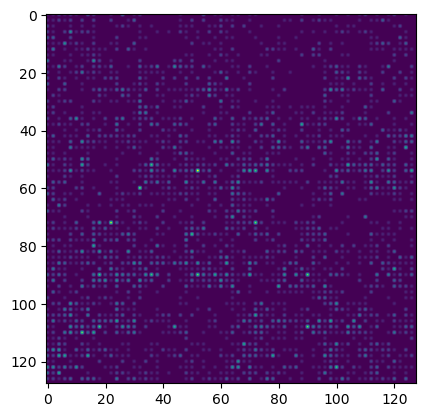

In [21]:
# mer3 = nucleotide_counter(intron, 3)
# mer4 = nucleotide_counter(intron, 4)
# mer5 = nucleotide_counter(intron, 5)
# mer6 = nucleotide_counter(intron, 6)
bcar3_abca4_mer7 = nucleotide_counter(bcar3_abca4, 7)

# chaos3 = chaos_game_representation(mer3, 3)
# chaos4 = chaos_game_representation(mer4, 4)
# chaos5 = chaos_game_representation(mer5, 5)
# chaos6 = chaos_game_representation(mer6, 6)
bcar3_abca4_chaos7 = chaos_game_representation(bcar3_abca4_mer7, 7)

# # print(something)

# plt.imshow(chaos3)
# plt.imshow(chaos4)
# plt.imshow(chaos5)
# plt.imshow(chaos6)
plt.imshow(bcar3_abca4_chaos7)
plt.imsave(str(cwd / "FractalImage" / "Fusion.png"), bcar3_abca4_chaos7)

Breakdown for BCAR3
Breakdown for BCAR3
Breakdown for BCAR3
Breakdown for BCAR3
Breakdown for BCAR3
Breakdown for BCAR3
<class 'TypeError'>
'NoneType' object is not iterable
<class 'TypeError'>
'NoneType' object is not iterable
Breakdown for ABCA4


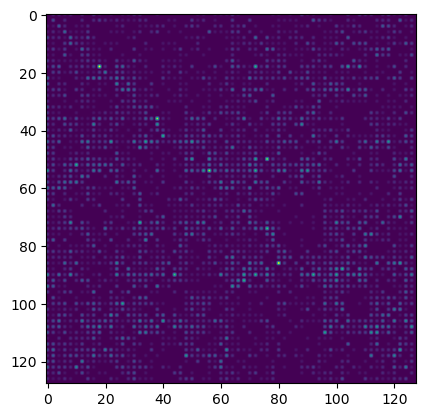

In [22]:
rows, cols = bcar3_abca4_data.shape

for row in range(rows):
    gene_of_interest: Gene = Gene.Gene(bcar3_abca4_data.loc[row, "name2"],
                                        ncibname = bcar3_abca4_data.loc[row, "name"], 
                                        chrm = bcar3_abca4_data.loc[row, "chrom"], 
                                        strand = bcar3_abca4_data.loc[row, "strand"], 
                                        txStart = bcar3_abca4_data.loc[row, "txStart"],
                                        txEnd = bcar3_abca4_data.loc[row, "txEnd"],
                                        cdsStart = bcar3_abca4_data.loc[row, "cdsStart"],
                                        cdsEnd = bcar3_abca4_data.loc[row, "cdsEnd"],
                                        exonCount = bcar3_abca4_data.loc[row, "exonCount"],
                                        exonStarts = bcar3_abca4_data.loc[row, "exonStarts"],
                                        exonEnds = bcar3_abca4_data.loc[row, "exonEnds"],
                                        exonFrames = bcar3_abca4_data.loc[row, "exonFrames"])
    
    gene_of_interest.sequence_breakdown()

    exon = f""

    try:
        for utr5 in gene_of_interest.utr5_seq:
            exon = f"{exon}{utr5}"
    except Exception as E:
        print(type(E))
        print(E)

    try:
        for cds in gene_of_interest.cds_seq:
            exon = f"{exon}{cds}"
    except Exception as E:
        print(type(E))
        print(E)

    try:
        for utr3 in gene_of_interest.utr3_seq:
            exon = f"{exon}{utr3}"
    except Exception as E:
        print(type(E))
        print(E)

    exon_7mer = nucleotide_counter(exon, 7)
    exon_cgr = chaos_game_representation(exon_7mer, 7)

    plt.imshow(exon_cgr)
    gncib = gene_of_interest.ncibname
    gname = gene_of_interest.name
    plt.imsave(str(cwd / "FractalImage" / f"{gname}_{gncib}_EXON.png"), exon_cgr)


# gene_of_interest.sequence_breakdown()

# single_row: pandas.Series = gene_of_interest.new_row()

# # print(single_row)
# single_row.to_pickle(str(cwd / "FractalSeq.pkl"))



In [ ]:

# sections = tuple(single_row.index)

# for section in sections:
#     if re.search(r"Seq", section):

#         seq = single_row[section]
#         seq_len = len(seq)

#         for k in range(3, 7):
#             mer = nucleotide_counter(seq, k)
#             chaos = chaos_game_representation(mer, k)

#             # plt.title(f"{section}\n{k}mer")
#             plt.imsave(str(cwd / "FractalImages" / f"{k}mer_{section}.png"), chaos)

        

['AGTTTCGAGACGGACGAAATGTCCTCCTCCAAGGTTAAATGCGCTCTCCCGTCAATTTTAGACCAACTTAAAGAGTATAGAGAGACAGACTAACTGAACACGTGGAAACGACGGGGTATCGTTAGCGTAAACTTTAAGTCAGAACGTCTAAAGTAAGTAAAGAAGTAGACCAACTTTTG', 'GACGGTCCTAGGAGAGTCGTAAGTAGGCCATCGACAGACGTCGGAGCCGGTACTTAGCGCGACAACGGTTTACCAAGTCGTACTAAAGTGTCGAGACCAGCAAAAAAAGGGTGTACAGCCAAGGAAGTTTTCAGTGTCGGACCGCGAGGTAATTGCAGTGTTCGCCGTAGTCGTCACCCTGACTATGTAACAAACCCCCTTGTGTACACCTGA', 'GAGACGGAAGTACGTCCTCAAACGACTTCCCGAAGTCGACAAAGAGTATCTCTTACCGTCAAACCCACATGACCACGGCGTCTCGTCAGGTGCAGAAAAGATTGGAACACTA', 'GACACCGTAAAGGTCCCGAAAGTACTCTCGACTCTTCCTTATCTCCAGGGGGTACCTTAGGAAGTCAAGGTGGCGGTGGACCTACTAGAATGAGTCTCACCGGCGAGCCAGGAGGTTTCACGGGCACGTAGGGTCTTACAGGTGACGTTACGGCTACCGGTAACACAACACA', 'GAAAGTTAATACAGGTCCGCGTCGACCACAGGCACTCCGTTCCATTACTCAAGGTCCGGACTCGAGTGGGGGTACAAGGAGGAGTAGAGAAGTCTCTGAGGTTCATAGGATCGTTG', 'GGACGTCAGGTACGAGTCATGCACGACCCGCTACTGGAACCCCAGCAACAACCACTTGTCAAGAAAACGTGCAAAGTTGTAACGACAAAGGTCCCCGAATAAGAGTCCCCCTTCCTTGAAACTGAGTTTGAGCAACCCGGACTTCCTCCTCTGTCAGAGGTCCTCCCCGCAGTGTTTGAGCGGGAA